# Results of different #agent values

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
results = pd.read_csv('./robots_results.csv')
results = results.drop_duplicates(subset=['planner','damage'])
results = results.groupby(['planner','num_robots','num_agents'], as_index=False).mean()
results.head()

,planner,num_robots,num_agents,f,d,active_time,completion_time,planner_time,damage,num_disabled
0,IterativeAssignmentPlanner,1,200,2.0,5.0,2234.922487,2234.922487,0.464894,193532.607205,200.0
1,IterativeAssignmentPlanner,2,200,2.0,5.0,847.747435,847.747435,0.595034,69900.944943,200.0
2,IterativeAssignmentPlanner,3,200,2.0,5.0,487.819601,487.819601,0.466261,38793.581284,200.0
3,IterativeAssignmentPlanner,4,200,2.0,5.0,357.500926,357.500926,0.780806,27859.903585,200.0
4,IterativeAssignmentPlanner,5,200,2.0,5.0,287.515906,287.515906,0.470474,22020.181804,200.0


In [25]:
planners_names = ['StaticLineLackPlanner',
                  'Practical100StaticLineLackPlanner',
                  'IterativeAssignmentPlanner',
                  'KmeansAssignmentPlanner']

planners_results = [results.loc[results['planner']==name] for name in planners_names]

## Settings

* the world is 100X300
* agents initialized in the bottom 100X100 square
* robots initialized somewhere under the world
* robots num is sufficient for full-blockage
* disablement range is 5
* agent speed v is 1
* robot speed fv is 2

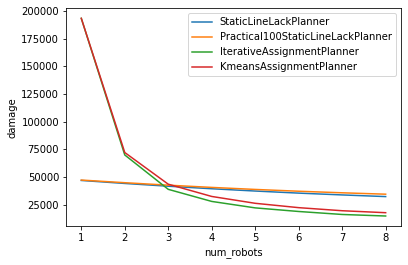

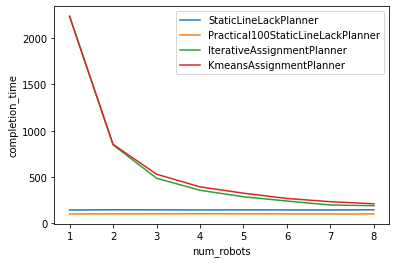

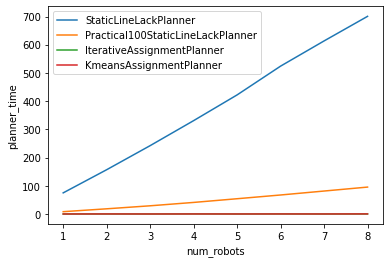

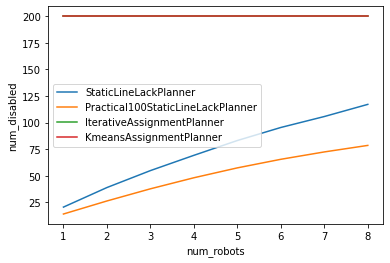

In [26]:
Y = ['damage', 'completion_time', 'planner_time', 'num_disabled']
X = ['num_robots' for y in Y]

for i in range(len(Y)):
    x = X[i]
    y = Y[i]

    plt.xlabel(x)
    plt.ylabel(y)

    for r in planners_results:
        plt.plot(list(r[x]),list(r[y]))

    plt.legend(planners_names)
    # plt.savefig(f'./plots/{x}-{y}.png')
    plt.show()